In [2]:
import pandas as pd
import numpy as np

In [15]:
alcohol_wine = pd.read_csv('wine1.csv', sep='\t')
sugar_wine = pd.read_csv('wine2.csv', sep='\t')

In [11]:
alcohol_wine.head()

,index,alcohol,class
0,7001,9.90,999.0
1,1,9.40,0.0
2,2,9.80,0.0
3,3,9.99,999.0
4,6498,9.80,0.0


In [12]:
sugar_wine.head()

,index,sugar_PH
0,7000,2.3/3.5
1,1,1.9/3.51
2,2,2.6/3.2
3,6498,2.3/3.26
4,4,1.9/3.16


In [45]:
alcohol_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500 entries, 0 to 6499
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   index    6500 non-null   int64  
 1   alcohol  6500 non-null   float64
 2   class    6496 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 152.5 KB


In [46]:
sugar_wine.info()
#sugar_ph object 형태이며 min max 형태이다

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6498 entries, 0 to 6497
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   index     6498 non-null   int64 
 1   sugar_PH  6498 non-null   object
dtypes: int64(1), object(1)
memory usage: 101.7+ KB


In [47]:
alcohol_wine.describe()
# class가 0과 1로 구성되어있는데 999라는 이상한값 나온다

,index,alcohol,class
count,6500.000000,6500.000000,6496.000000
mean,3250.577077,10.491542,1.215363
std,1876.676481,1.192498,21.453373
min,1.000000,8.000000,0.000000
25%,1625.750000,9.500000,1.000000
50%,3250.500000,10.300000,1.000000
75%,4875.250000,11.300000,1.000000
max,7001.000000,14.900000,999.000000


In [48]:
sugar_wine.describe()

,index
count,6498.000000
mean,3251.575408
std,1876.101534
min,1.000000
25%,1627.250000
50%,3251.500000
75%,4875.750000
max,7000.000000


In [44]:
alcohol_wine.isna().sum(), sugar_wine.isna().sum()
# 결측치 있다

(index      0
 alcohol    0
 class      4
 dtype: int64,
 index       0
 sugar_PH    0
 dtype: int64)

In [25]:
## 두개의 인덱스와 숫자 확인
print(len(alcohol_wine), len(sugar_wine))
## 두개의 차이가 있다
#merge해서 확인을 해야하나?

6500 6498


In [31]:
for i in alcohol_wine['index'].tolist():
    if i not in sugar_wine['index'].tolist():
        print(i)
print('---------------')
for i in sugar_wine['index'].tolist():
    if i not in alcohol_wine['index'].tolist():
        print(i)
# 7001, 3, 10의 인덱스가 와인에 없고
# 7000이 알코올에 없다
#총 4개의 결측치가 발생한다
#6496개

7001
3
10
---------------
7000


In [40]:
df = pd.merge(alcohol_wine, sugar_wine, on='index',how='left')
# 두개 인덱스 기준으로 merge 한다

In [42]:
len(df)

6500

In [43]:
df.isna().sum()

index       0
alcohol     0
class       4
sugar_PH    3
dtype: int64

## 결측치 제거

In [51]:
df.dropna(inplace=True)

In [53]:
len(df)

6493

In [54]:
df.head()

,index,alcohol,class,sugar_PH
1,1,9.4,0.0,1.9/3.51
2,2,9.8,0.0,2.6/3.2
4,6498,9.8,0.0,2.3/3.26
5,4,9.8,0.0,1.9/3.16
6,5,9.4,0.0,1.9/3.51


In [61]:
df.sugar_PH.apply(lambda x : float(str(x).split('/')[0]))

1       1.9
2       2.6
4       2.3
5       1.9
6       1.9
       ... 
6495    1.6
6496    8.0
6497    1.2
6498    1.1
6499    0.8
Name: sugar_PH, Length: 6493, dtype: float64

In [63]:
# sugar ph min max 로 나누기
df['min_sugar_PH'] = df.sugar_PH.apply(lambda x : float(str(x).split('/')[0]))
df['max_sugar_PH'] = df.sugar_PH.apply(lambda x : float(str(x).split('/')[1]))

In [64]:
df.head()

,index,alcohol,class,sugar_PH,min_sugar_PH,max_sugar_PH
1,1,9.4,0.0,1.9/3.51,1.9,3.51
2,2,9.8,0.0,2.6/3.2,2.6,3.20
4,6498,9.8,0.0,2.3/3.26,2.3,3.26
5,4,9.8,0.0,1.9/3.16,1.9,3.16
6,5,9.4,0.0,1.9/3.51,1.9,3.51


In [65]:
del df['sugar_PH']

In [67]:
df.head()

,index,alcohol,class,min_sugar_PH,max_sugar_PH
1,1,9.4,0.0,1.9,3.51
2,2,9.8,0.0,2.6,3.20
4,6498,9.8,0.0,2.3,3.26
5,4,9.8,0.0,1.9,3.16
6,5,9.4,0.0,1.9,3.51


In [69]:
df.info() # 슈가 object 값 삭제확인 및 값 잘 들어갔는지 확인

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6493 entries, 1 to 6499
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         6493 non-null   int64  
 1   alcohol       6493 non-null   float64
 2   class         6493 non-null   float64
 3   min_sugar_PH  6493 non-null   float64
 4   max_sugar_PH  6493 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 304.4 KB


In [70]:
df.describe()
# class값은 0 아님 1 
# y값으로 클래스를 둔다

,index,alcohol,class,min_sugar_PH,max_sugar_PH
count,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000
mean,3252.989989,10.492504,0.754351,5.444910,3.218446
std,1874.529279,1.192735,0.430505,4.758624,0.160763
min,1.000000,8.000000,0.000000,0.600000,2.720000
25%,1630.000000,9.500000,1.000000,1.800000,3.110000
50%,3253.000000,10.300000,1.000000,3.000000,3.210000
75%,4876.000000,11.300000,1.000000,8.100000,3.320000
max,6499.000000,14.900000,1.000000,65.800000,4.010000


## 연관도 분석

<AxesSubplot:xlabel='max_sugar_PH', ylabel='Count'>

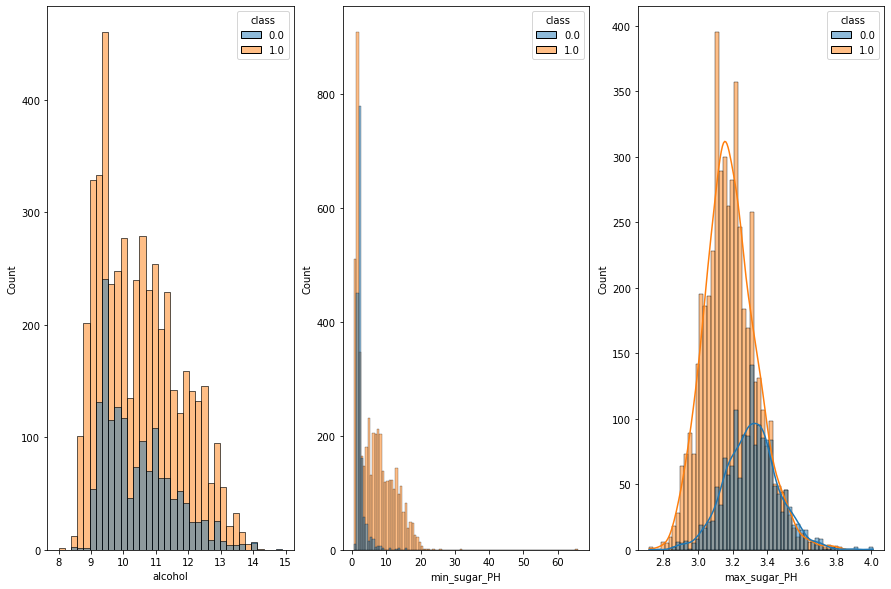

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1,3,figsize=(15,10))
sns.histplot(x='alcohol', data=df, hue='class', ax=axes[0])
sns.histplot(x='min_sugar_PH', data=df, hue='class', ax=axes[1])
sns.histplot(x='max_sugar_PH', data=df, hue='class', kde=True, ax=axes[2])
#클래스와 연관관계

## 스케일링

In [78]:
from sklearn.preprocessing import StandardScaler

In [80]:
X = df[['alcohol', 'min_sugar_PH', 'max_sugar_PH']]
y = df[['class']]

In [81]:
scaler =StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
print(X)

[[-0.91603604 -0.74500161  1.81370171]
 [-0.58064657 -0.59788895 -0.11474916]
 [-0.58064657 -0.66093723  0.25849939]
 ...
 [-0.91603604 -0.89211427 -1.42111911]
 [ 1.93477446 -0.91313037  0.75616413]
 [ 1.09630078 -0.97617865  0.25849939]]


## 테스트 트레인 나누기

In [82]:
from sklearn.model_selection import train_test_split
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)



## 선형 회귀
- y = df.class
- x => index 제외 나머지

In [88]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

C:\Users\TH\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [96]:
pred = lr.predict(X_test)

## 모델평가

In [93]:
from sklearn.metrics import classification_report

In [97]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.60      0.38      0.46       462
         1.0       0.83      0.92      0.87      1486

    accuracy                           0.79      1948
   macro avg       0.71      0.65      0.67      1948
weighted avg       0.77      0.79      0.77      1948

